In [9]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
project_directory = os.path.dirname(os.getcwd())
raw_matches = os.path.join("data","raw","matches.csv")


In [11]:
df = pd.read_csv(os.path.join(project_directory, raw_matches), index_col=0).reindex()
df.head()

,Day,Date,Home/Away,Opponent,Score,W/L/T,Overtime,Location,Venue,Attendance,Notes,Home
0,Sun,10/10/1920,H,Columbus Panhandles,37-0,W,NaN,"Akron, OH",League Park,1500.0,NaN,Akron Pros
1,Sun,10/24/1920,H,Cleveland Tigers,7-0,W,NaN,"Akron, OH",League Park,5000.0,NaN,Akron Pros
2,Sun,10/31/1920,A,Canton Bulldogs,10-0,W,NaN,"Canton, OH",Lakeside Athletic Park,6000.0,NaN,Akron Pros
3,Sun,11/7/1920,A,Rock Island Independents,NaN,-,NaN,"Rock Island, IL",Douglas Park,NaN,Canceled,Akron Pros
4,Sun,11/7/1920,H,Detroit Heralds,NaN,-,NaN,"Akron, OH",League Park,NaN,Canceled,Akron Pros


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 15
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         32328 non-null  object 
 1   Date        32328 non-null  object 
 2   Home/Away   32323 non-null  object 
 3   Opponent    32328 non-null  object 
 4   Score       31852 non-null  object 
 5   W/L/T       32325 non-null  object 
 6   Overtime    1090 non-null   object 
 7   Location    32321 non-null  object 
 8   Venue       32274 non-null  object 
 9   Attendance  31538 non-null  float64
 10  Notes       1783 non-null   object 
 11  Home        32328 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.2+ MB


In [13]:
# Keep only games with scores
df.dropna(axis=0, subset=['Score'], inplace=True)

In [16]:
df['Date'] = pd.to_datetime(df.Date)
df[['Team Score', 'Opponent Score']] = df.Score.str.split('-', expand=True)

<AxesSubplot:ylabel='Frequency'>

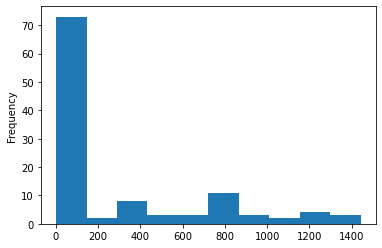

In [28]:
df.Opponent.value_counts().plot.hist()

In [17]:
sort_by_date = df.sort_values(by=['Date', 'Venue', 'Home/Away'])
sort_by_date.head()

,Day,Date,Home/Away,Opponent,Score,W/L/T,Overtime,Location,Venue,Attendance,Notes,Home,Team Score,Opponent Score
0,Sun,1920-10-03,A,Rock Island Independents,0-45,L,NaN,"Rock Island, IL",Douglas Park,3100.0,NaN,Muncie Flyers,0,45
0,Sun,1920-10-03,H,Muncie Flyers,45-0,W,NaN,"Rock Island, IL",Douglas Park,3100.0,NaN,Rock Island Independents,45,0
0,Sun,1920-10-03,A,Dayton Triangles,0-14,L,NaN,"Dayton, OH",Triangle Park,NaN,NaN,Columbus Panhandles,0,14
0,Sun,1920-10-03,H,Columbus Panhandles,14-0,W,NaN,"Dayton, OH",Triangle Park,NaN,NaN,Dayton Triangles,14,0
0,Sun,1920-10-10,A,Chicago Tigers,0-0,T,NaN,"Chicago, IL",Cubs Park,8000.0,NaN,Chicago Cardinals,0,0
